* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 32

---
---

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import folium
import base64
import requests
from io import BytesIO

### **1. Gunakan Folium, dan buatlah Map Tugu Monas, beri pin point di pusatnya. Ketika titik pusat tersebut di klik, akan keluar foto monas dan Ketika di hover, juga akan keluar foto Monas**


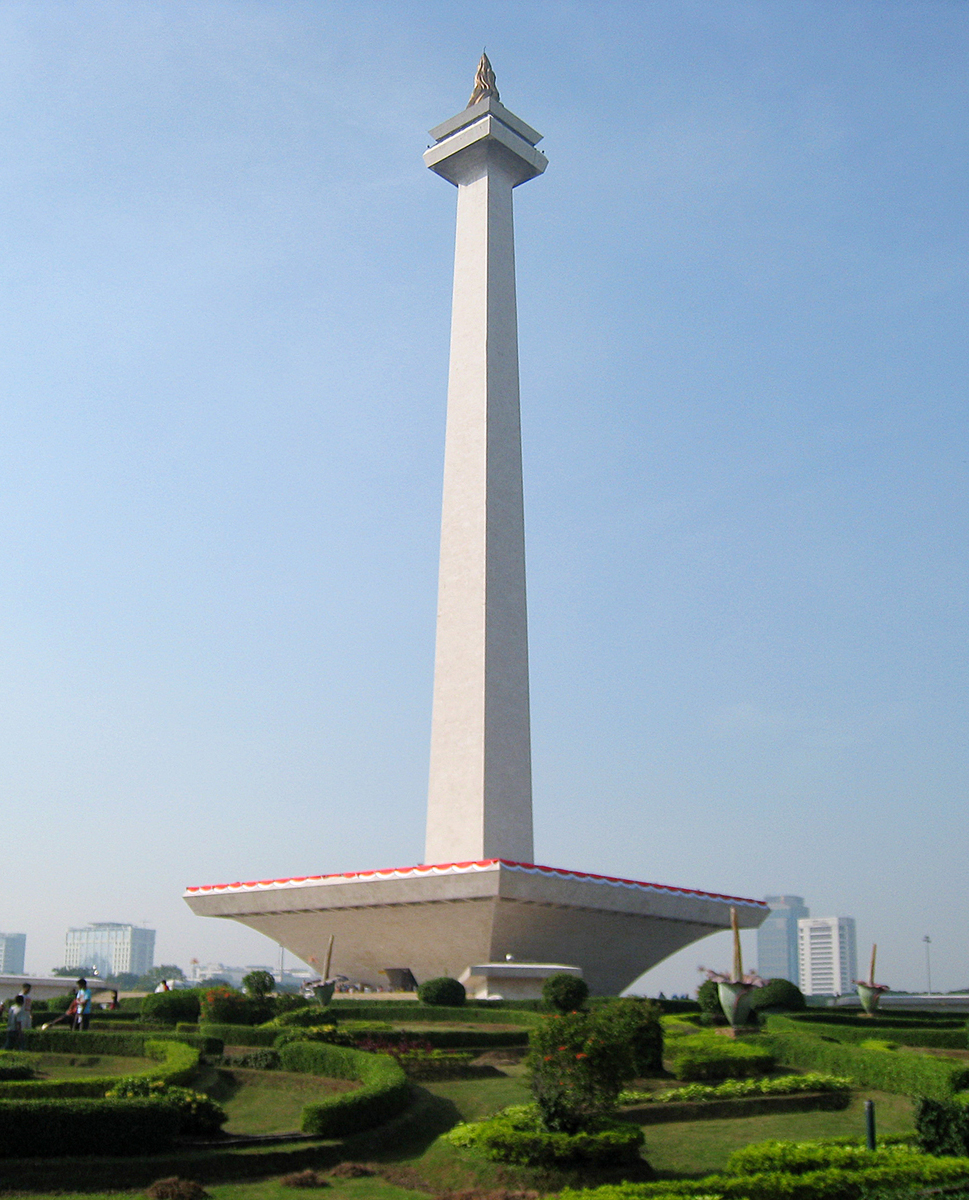
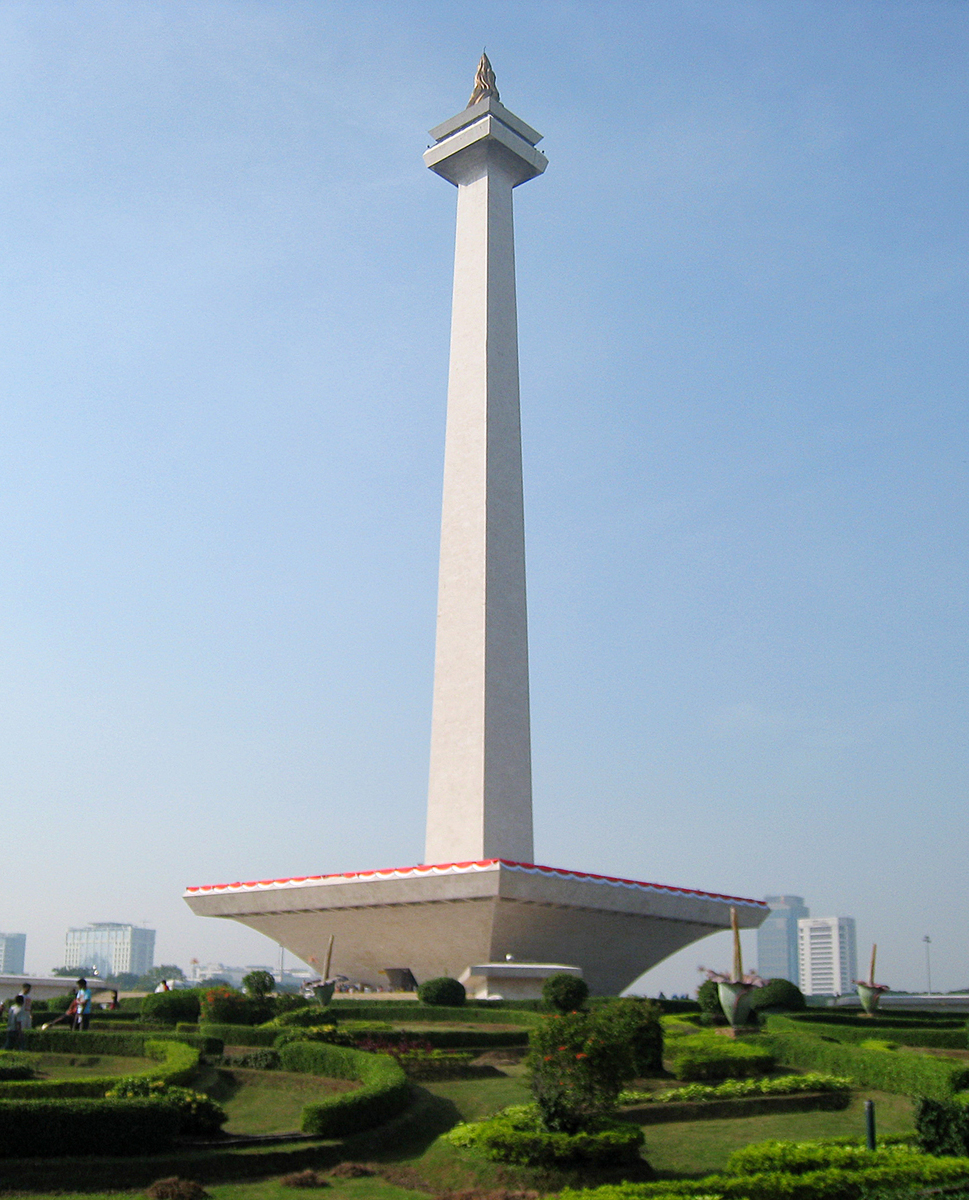

In [21]:
#Konversi Image ke Base64

monas_image_url = "https://upload.wikimedia.org/wikipedia/id/b/b1/Merdeka_Square_Monas_02.jpg"
response = requests.get(monas_image_url)
image_data = BytesIO(response.content)

base64_encoded = base64.b64encode(image_data.getvalue()).decode("utf-8")
monas_image_url = f"data:image/jpeg;base64,{base64_encoded}"

# Koordinat Monas
latitude = -6.175237734579502
longitude = 106.8271152490735

# Peta Pusat Tugu Monas
monas_map= folium.Map(location = [latitude, longitude], 
                      zoom_start = 16)

# Tambahkan marker dengan popup dan tooltip yang menampilkan gambar Monas
folium.Marker(
    location = [latitude, longitude],
    popup = folium.Popup(f'<img src="{monas_image_url}" width="300" height="300">', 
                         max_width = 150),
    tooltip=f'<img src = "{monas_image_url}" width = "100" height = "100">'
).add_to(monas_map)

# Simpan peta ke file HTML
monas_map.save("map_tugu_monas.html")

monas_map

### **2. Import dataset Tips dari Seaborn**

In [22]:
tips = sns.load_dataset("tips")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### **3. Buatlah suatu boxplot yg menampilkan distribusi Total bill setiap harinya untuk masing-masing gender(sex).**

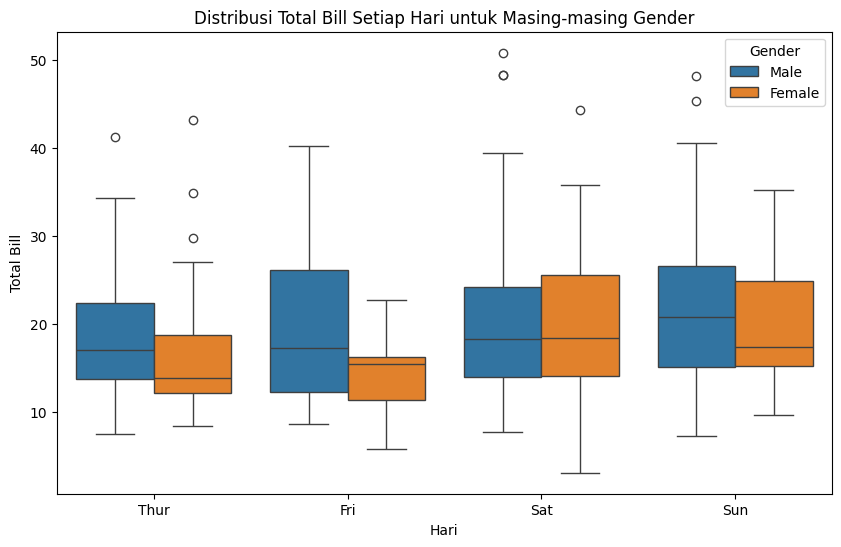

In [23]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = tips,
            x = 'day', 
            y = 'total_bill', 
            hue = 'sex')

plt.title('Distribusi Total Bill Setiap Hari untuk Masing-masing Gender')
plt.xlabel('Hari')
plt.ylabel('Total Bill')

plt.legend(title = 'Gender')
plt.show()

### **4. Buatlah suatu grafik yg menampilkan hubungan antara total bill dan tips beserta distribusi data keduanya dalam 1 grafik.**

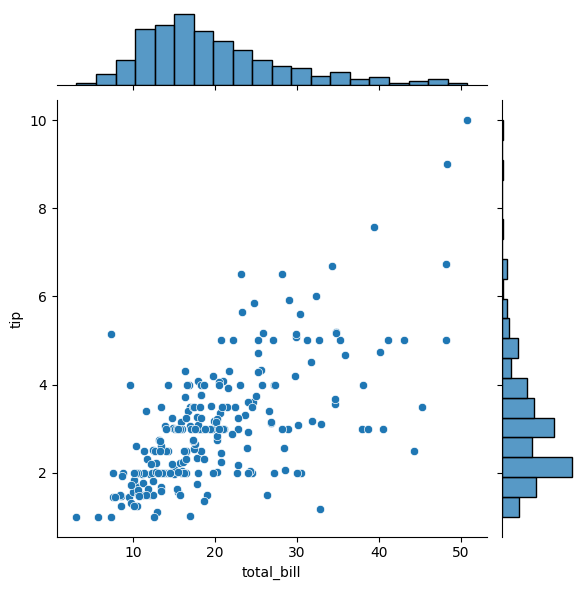

In [24]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="scatter", 
    marginal_kws=dict(bins=20, fill=True)
)

plt.show()

### **5. Buatlah suatu grafik yg menampilkan hubungan antara total bill dan tips setiap harinya**

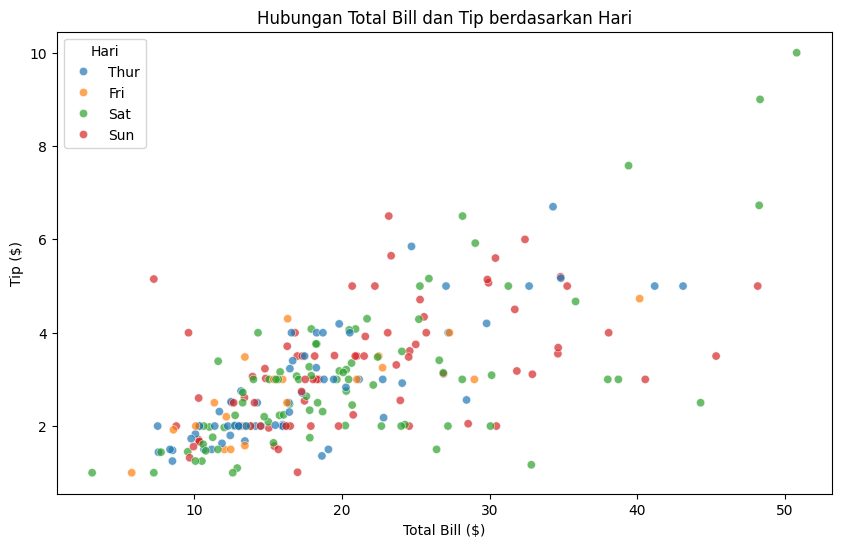

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="day",
    palette="tab10",
    alpha=0.7  
)

plt.title("Hubungan Total Bill dan Tip berdasarkan Hari")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend(title="Hari")
plt.show()

### **6. Buatlah suatu grafik yg menampilkan hubungan antara total bill dan tips antara perokok dan non perokok setiap waktu makan untuk masing-masing gender.**

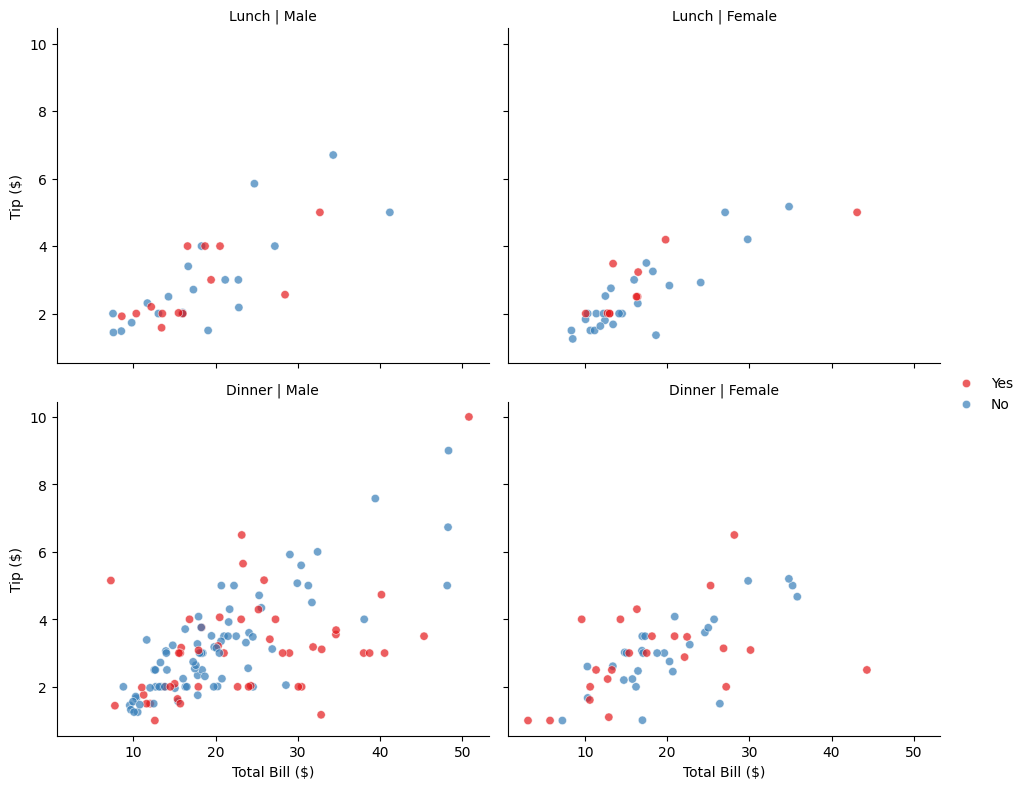

In [26]:
g = sns.FacetGrid(tips, col="sex", row="time", height=4, aspect=1.2)

g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="smoker", alpha=0.7, palette="Set1")

g.set_axis_labels("Total Bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()

plt.show()